<a href="https://colab.research.google.com/github/Juniorexz/Codigo/blob/master/An%C3%A1lise_de_Cart%C3%A3o_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

dataframe = pd.read_csv('CC GENERAL.csv')
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
dataframe = pd.read_csv('CC GENERAL.csv')
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [3]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [4]:
#Após buscar os dados nulos que não estão preenchidos pego o minimo e calculo a mediana no caso do 313
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [5]:
#Após isso devo normalizar os dados(colocar os valores enttre 0 e 1) deixando os dados limpos
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [6]:
#Clustering(Clusterização), categorização
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)


In [7]:
#Métricas de validação externas e internas
#Vamos usar as internas por não termos labels

O primeiro cluster possui pontos bem próximos uns dos outros, o que é bem parecido com os outros dois. Então visualmente parecem estar bem compactos.

Imagem com título "Compactação" escrito no topo. Ao centro, há um gráfico com dois eixos, o horizontal graduado de zero a três a cada um ponto, e eixo vertical graduado de zero a quatro a cada um ponto. Dentro, há três grupos diferentes circunscritos por círculos de cores distintas, contendo três elementos internos cada um bem próximos uns dos outros, os quais são representados por figuras de rostos humanos. Um primeiro grupo de cor verde possui seus elementos próximos ao valor um do eixo horizontal e entre um e dois do vertical. Um segundo grupo de cor vermelha está acima do anterior, entre os valores um e dois do eixo horizontal e próximo de quatro do vertical. Por fim, um último grupo de cor amarela está pouco após o valor dois do eixo horizontal e próximo de um do vertical.

Já no segundo caso, a compactação não é tão boa para um determinado grupo, tendo um elemento dissidente, mais afastado dos outros valores do cluster, que antes pertencia a um grupo e agora passa a ser circunscrito por outro.

Desta forma, dois grupos continuam com elementos compactos, um com três pontos e o outro com dois, enquanto o terceiro cluster possui três elementos próximos e um afastado, totalizando quatro pontos.

Mesma representação anterior com o título "Compactação". Porém, o último grupo de cor amarela descrito cujos três elementos internos estavam logo após do valor dois do eixo horizontal e um do eixo vertical, circunscreve um novo quarto elemento um pouco mais distante, o qual pertencia anteriormente ao primeiro grupo de cor verde, e este ponto está pouco após um do eixo horizontal e entre um e dois do vertical. O grupo o qual pertencia este elemento passa a ter somente dois pontos alinhados verticalmente e próximos entre si no valor um do eixo horizontal.

Isso indica que o segundo resultado é menos eficiente que o primeiro.

O segundo critério de validação é a separação, que indica quão bem separados estão os pontos em clusters diferentes. A ideia é justamente o contrário da compactação, quanto mais distantes estão os clusters um dos outros, melhor. Isso significa que estão mais diversificados.

Ao observarmos o primeiro exemplo de compactação, notaremos que os grupos estão bem divididos, apesar dos elementos internos de cada um deles estarem agrupados.

No segundo exemplo, a separação não está boa, afinal o elemento afastado está muito mais próximo do outro grupo. Neste caso não temos nem uma boa separação nem uma boa compactação.Temos a fórmula para calcular o coeficiente que se baseia em dois principais valores: beta e alfa.

Coeficiente de Silhouette
fórmula em que "s" é igual a "beta" menos "alfa", dividido por "max" de "alfa" vírgula "beta" entre parênteses.

Começaremos por calcular o valor de alfa, isto é, a distância média entre o ponto e todos os outros pontos do mesmo cluster. Vamos verificar a compactação dos elementos.

Utilizaremos o mesmo exemplo dos três clusters, e cada um contém três elementos próximos entre si.

Imagem com título "Compactação" escrito no topo. Ao centro, há um gráfico com dois eixos, o horizontal graduado de zero a três a cada um ponto, e eixo vertical graduado de zero a quatro a cada um ponto. Dentro, há três grupos diferentes circunscritos por círculos de cores distintas, contendo três elementos internos cada um bem próximos uns dos outros, os quais são representados por figuras de rostos humanos. Um primeiro grupo de cor verde possui seus elementos próximos ao valor um do eixo horizontal e entre um e dois do vertical. Um segundo grupo de cor vermelha está acima do anterior, entre os valores um e dois do eixo horizontal e próximo de quatro do vertical. Por fim, um último grupo de cor amarela está pouco após o valor dois do eixo horizontal e próximo de um do vertical.

Nos basearemos em duas dimensões "(x,y)", sendo "x" o eixo horizontal e "y" o vertical, e utilizaremos dois atributos dos dezesseis que temos disponíveis em nosso dataframe.

Selecionaremos um ponto específico, um cliente, e a partir dele calcularemos a média para outros elementos do cluster. Chamaremos este primeiro ponto de "A", o que está mais próximo da origem do gráfico.

Para o eixo "x", utilizaremos o valor de 1,0, e para "y", 0,9. Feito isso, mediremos a distância do ponto "A" para o ponto "B" e "C" e criaremos uma tabela com todos os valores que precisamos.

Mesma representação anterior que passa a ter o título "alfa", porém o grupo de cor verde mais próximo da origem do gráfico possui os nomes "A", "B" e "C" para cada ponto circunscrito, e o eixo horizontal possui a legenda "x" enquanto o eixo vertical possui a legenda "y".

x	y
A	1,0	0,9
B	1,0	1,7
C	1,3	1,5
Este são os valores das variáveis, e com base nisso iremos calcular a distância euclidiana, portanto usaremos sua fórmula.

Podemos ver que começaremos calculando de A até B, e temos alguns valores que substituiremos pelos que valores de "x" para A e de "x" para B, e "y" para A e "y" para B que temos na tabela.

Distância Euclidiana
Fórmula em que a distância "d" entre "A" e "B" é igual a, abrindo raiz quadrada, abre parênteses dentro, "x" de "B" menos "x" de A, fecha parênteses ao quadrado, mais "y" de "B" menos "y" de A, fecha parênteses ao quadrado também. Abaixo, estão os valores substituídos, em que a distância "d" entre "A" e "B" é igual a, abrindo raiz quadrada, abre parênteses, um menos um, fecha parênteses ao quadrado, mais, abre parênteses, um vírgula sete menos zero vírgula nove, fecha parênteses ao quadrado.

Continuando o cálculo acima, chegaremos ao resultado de 0,8. Essa é a distância Euclidiana entre A e B. Faremos o mesmo procedimento para a distância entre A e C substituindo os valores na fórmula segundo a tabela, a qual será 1,12 ao final do cálculo.

Nossos valores finais serão:

d(A, B) - 0,8

d(A, C) = 1,12

Feito isso, obteremos a média entre os dois valores finais, e o resultado do valor de alfa é 0,96. Voltaremos à fórmula do coeficiente de Silhouette que apresentamos no início da aula e substituiremos a variável alfa por esse valor.

Estamos fazendo o coeficiente de Silhouette para o ponto "A", e o valor final que vimos na fórmula do scikit-learn é a média de todos os pontos do cluster. Mas aqui calcularemos um por um.

Nosso próximo passo é calcular o valor de beta, que é a distância média entre o ponto e todos os outros pontos do cluster mais próximo. Então calcularemos a distância entre pontos de clusters diferentes, ou seja, os queremos em separado.

Para sabermos qual é o cluster mais próximo, deveremos tirar a média entre os pontos para os dois clusters e coletar o menor valor, e este será o mais próximo.

Faremos o mesmo procedimento que realizamos anteriormente, mas com pontos diferentes. Novamente pegaremos nosso ponto A que ja sabemos o valor de "x" e "y", depois colocaremos novos pontos D, E e F com seus respectivos valores de "x" e "y", formando uma nova tabela.

Mesma representação gráfica com os três clusters contendo três elementos internos próximos, porém o título passa a ser "b". O grupo de cor verde, mais próximo da origem do gráfico possui seu ponto mais perto do eixo horizontal com legenda "A", e está conectado por linhas ao segundo cluster de cor vermelha que possui maior valor em relação ao eixo "y", cujos pontos estão com legenda "D", F" e "E".

x	y
A	1,0	0,9
D	1,3	3,9
E	1,5	4,3
F	1,6	3,7
Aplicaremos a fórmula da distância Euclidiana novamente, e chegaremos ao resultado final de 3,01 da distância de A até D. Depois, faremos a distância de A até o ponto E com a mesma fórmula, resultando em 3,43. Por fim, a distância de A até F será de 2,86.

Tiraremos a média dos valores somando-os e dividindo por três, e chegaremos ao resultado final da distância média 3,1 para "beta", que é o ponto A de um cluster até o outro cluster.

Depois, faremos o mesmo procedimento para as distâncias entre o ponto A e o último cluster que está mais avançado nos valores em relação ao eixo "x", obtendo a seguinte tabela:

x	y
A	1,0	0,9
G	2,1	0,8
H	2,2	1,5
I	2,5	0,9
Aplicaremos novamente a fórmula da Distância Euclidiana que já sabemos como calcular, e obteremos a distância entre os pontos A e G igual a 1,10. Depois, chegaremos à distância de 1,34 entre os pontos A e H, e por fim teremos o valor de 1,5 entre os pontos A e I.

Em seguida, faremos a média dos três valores e obteremos 1,31 para a distância entre o primeiro e o terceiro cluster que calculamos.

Para o elemento beta, temos que pegar o cluster com a menor distância, que neste caso será o último que calculamos cuja média é 1,31. Portanto, este será o valor de beta que será substituído na fórmula do Coeficiente de Silhouette.

fórmula em que "s" é igual a um vírgula trinta e um, menos zero vírgula noventa e seis, dividido por "max" de "zero vírgula noventa e seis"e "um vírgula trinta e um" entre parênteses.

O resultado final deste cálculo será de 0,26.

O resultado sempre está entre 1 e -1, então neste caso consideramos que temos um bom valor positivo e nossos clusters são válidos.

In [8]:
#Aplicando Silhouette
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36450360640080837


Índice Davies-Bouldin


Temos a fórmula de Davies-Bouldin, e vamos passar cada parte para compreendermos o que significa e quais são seus valores. Começaremos por "R".

Fórmula do índice de Davies-Bouldin em que "DB" é igual a um sobre "k", vezes a somatória de "Max" de "R" maiúsculo no índice "ij" indo de "i" igual a "1" até "k", em que "i" é diferente de "j".

"R" Evoca outra formula para ser calculado, e basicamente nos entrega uma medida de similaridade entre dois clusters, "i" e "j".

Outra fórmula do índice Davies-Bouldin em que "R" no índice "ij" é igual a "S" no índice "i" mais "S" no índice "j", tudo dividido por "d" no índice "ij".

O "S" é a similaridade dentro do cluster, isto é, compactação. Já o "d" reflete a similaridade entre clusters, a separação. Assim temos os dois critérios importantes çara uma boa validação que já discutimos.

Para calcularmos, o "S" será a distância média entre cada ponto do cluster e seu centróide. Já calculamos a distância por meio da fórmula de Silhouette na aula anterior, mas a diferença neste caso é que calcularemos a distância de um ponto até o centro do cluster, e não a média.

Começaremos a calcular o valor de "S" para o primeiro cluster que chamaremos de "S0" que contém três elementos: "A", "B" e "C" com os valores de "x" e "y" que já calculamos anteriormente, mas ainda resta o valor do centróide "ct".

O centróide nada mais é que a média de todos os pontos dentro do cluster para cada um dos atributos, isto é, para "x", coletaremos os valores de "A", "B" e "C" e depois faremos a média, o mesmo se dá com "y".

Feito isso, teremos os valores de "ct" de "1,1" para "x" e "1,3" para "y". Portanto, cada uma das variáveis terá um valor do centróide.

Aplicaremos isso no gráfico para facilitar a compreensão usando linhas tracejadas até a localização do ponto central do grupo "S0".

Imagem com título "S0" escrito no topo. Ao centro, há dois eixos, o horizontal "X" graduado de zero a três a cada um ponto, e eixo vertical graduado de zero a quatro a cada um ponto. Dentro, há três grupos diferentes circunscritos por círculos, contendo três elementos internos cada um, os quais são bem próximos uns dos outros e são representados por figuras de rostos humanos. Um primeiro grupo possui seus pontos entre um e dois do eixo horizontal, e cerca de quatro do eixo vertical Há uma linha tracejada vertical que está em um ponto pouco após o valor um do eixo "x", e outra linha tracejada horizontal que parte de um pouco acima do valor um do eixo "y", e ambas as linhas tracejadas se encontram exatamente no centro deste primeiro grupo. Um segundo grupo, também com elementos internos bem próximos entre si, está próximo ao valor um do eixo horizontal e entre um e dois do vertical, e o terceiro grupo está localizado pouco após o valor dois do eixo horizontal e próximo ao valor um do vertical.

X	Y
A	1,0	0,9
B	1,0	1,7
C	1,3	1,5
ct	1,1	1,3
O próximo é tirarmos a média dos pontos até o centróide. Calcularemos a distância de cada um dos pontos até o centróide, por meio da distância euclidiana.

Distância Euclidiana
Fórmula em que a distância "d" entre "A" e "ct" é igual a, abrindo raiz quadrada, abre parênteses dentro, "x" de "ct" menos "x" de A, fecha parênteses ao quadrado, mais "y" de "ct" menos "y" de A, fecha parênteses ao quadrado também. Abaixo, estão os valores substituídos, em que a distância "d" entre "A" e "B" é igual a, abrindo raiz quadrada, abre parênteses, um vírgula um, menos um vírgula zero, fecha parênteses ao quadrado, mais, abre parênteses, um vírgula três menos zero vírgula nove, fecha parênteses ao quadrado. Abaixo, o resultado da operação é a distância "d" entre "A" e "ct" é igual à raiz quadrada de zero vírgula dezessete, que por sua vez é igual a zero vírgula quarenta e um como resultado final da distância "d" entre "A" e "ct".

d(A,ct) = 0,41

d(B,ct) = 0,41

d(C,ct) = 0,28

Faremos o mesmo procedimento para todos os outros pontos.

Feita a substituição na fórmula, obteremos a distância de "A" até o centróide é de "0,41", de "B" é "0,41" e de "C" é "0,28". Ao retirarmos a média, temos o resultado de "0,36", que representa a similaridade dentro de um cluster.

Repetiremos o procedimento com os outros dois clusters, em que o "S1" terá os pontos "D", "E" e "F", e o "S2" terá os pontos "G", "H", e "I".

Mesma imagem do gráfico contendo os três grupos já descritos. Porém, no grupo mais próximo à origem do gráfico, há o escrito "S0" igual a zero vírgula trinta e seis ao lado, e há um ponto preto no centro do círculo. No segundo grupo mais adiante no eixo horizontal e próximo ao valor um do vertical, também há o escrito "S2" igual a zero vírgula trinta e quatro, além de um ponto preto centro do círculo porém mais próximo ao lado esquerdo do grupo. Por fim, o terceiro grupo próximo ao valor quatro do eixo vertical possui o escrito "S1" igual a zero vírgula vinte e seis, e possui um ponto preto um pouco abaixo à esquerda do centro do círculo.

X	Y
D	1,3	3,9
E	1,5	4,3
F	1,6	3,7
ct	1,4	3,9
Ao substituirmos os valores na fórmula da Distância Euclidiana, obteremos os valores:

d(D,ct) = 0,10

d(E,ct) = 0,41

d(F,ct) = 0,28

Tirando a média, teremos que "S1" é igual a "0,26".

Calculando os valores para o último cluster, teremos os seguintes valores e notaremos que o ponto não ficou exatamente ao centro também:

X	Y
G	2,1	0,8
H	2,2	1,5
I	2,5	0,9
ct	2,2	1,0
d(G,ct) = 0,22

d(H,ct) = 0,50

d(I,ct) = 0,31

Tirando a média, teremos que "S2" é igual a "0,34".

A próxima etapa é descobrir a distância entre os centróides dos clusters, ou seja, a distância "d" para "i" e "j"j. Começaremos com a distância do cluster "S0" e "S1". Utilizaremos os valores que adquirimos por meio da distancia euclidiana, mas dessa vez nos basearemos unicamente nos centróides. O resultado de "d01" será de 2,61.

Mesma imagem do gráfico contendo os três grupos já descritos, e título "d01". Porém o grupo mais próximo à origem do gráfico possui a legenda "0" e seu ponto preto central se conecta com uma linha ao ponto preto dentro do círculo do grupo que está próximo de quatro do eixo "y", o qual possui a legenda "1" escrito acima.

Centróides

x	y
S1	1,4	3,9
S0	1,1	1,4
d01 = 2,61

Faremos a o mesmo procedimento para descobrir a distância "d02" entre os outros centróides "S0" e "S2".

Centróides

x	y
S2	2,2	1,0
S0	1,1	1,3
d02 = 1,14

Por fim, calcularemoa a distância "d12" entre o cluster "S1" e "S2".

Centróides

x	y
S1	1,4	3,9
S2	2,2	1,0
d12 = 3,00

Mesma imagem do gráfico contendo os três grupos já descritos. Porém, no grupo mais próximo à origem do gráfico, há o escrito "S0" igual a zero vírgula trinta e seis ao lado, e há um ponto preto no centro do círculo, o qual se liga por uma linha de legenda "d01" igual a dois vírgula sessenta e um até o outro ponto preto próximo ao centro do outro grupo  que está próximo ao valor quatro do eixo vertical e que possui o escrito "S1" igual a zero vírgula vinte e seis. Em seguida, este mesmo ponto do grupo "S1" se liga por uma linha de legenda "d12" igual a três vírgula zero zero até o ponto preto próximo ao centro do outro grupo mais adiante no eixo horizontal e próximo ao valor um do vertical, o qual possui o escrito "S2" igual a zero vírgula trinta e quatro. Por fim, o ponto preto mais ao lado esquerdo do círculo deste último grupo se liga ao ponto central do grupo "S0" novamente através de uma linha "d02" igual a um vírgula quatorze, fechando a figura de um triângulo.

Desta forma, teremos feito os cálculos necessários entre cluster e dentro de cada um.

Faremos a conta para obter os resultados de "R" para "i" e "j". Resolvendo a fórmula, somaremos o valor interno dos clusters em "s" e dividiremos pelo valor da distância entre eles.

Retornaremos ao índice Davies-Bouldin, e começaremos calculando o valor de "R" para o cluster "S0" e "S1", e o resultado será 0,23 para "R01". Em seguida, os valores para os outros Clusters serão de "0,61" e "0,20" para "R02" e "R12" respectivamente.

Fórmula matemática em que "s0" mais "s1" está dividido por "d01". Ao lado, os valores foram sobstituídos e obtivemos "0,36" mais "0,26" dividido por "2,61". Depois, resulta em "0,62" dividido por "2,61" que leva ao resultado final de "0.23".

Este índice, no geral, o mínimo possível é zero. Isso aconteceu porque o valor de "d" entre "S0" e "S2" foi consideravelmente menor do que os outros.

O maior valor reflete o pior resultado para "R", afinal quanto mais próximo de zero, melhor. Para analisarmos a eficiência do nosso cluster, precisamos coletar qual seria seu pior exemplo.

Continuando o cálculo, substituiremos os valores na fórmula do Índice Davies-Bouldin e, basicamente para cada um dos clusters, pegaremos o maior valor de "R".

Começando com o cluster "S0", selecionaremos o maior valor que é do "R02" igual a "0.61". Para o cluster "S1", pegaremos o maior valor de "0,23" e, por fim, escolheremos o valor "0,61" para o cluster "S2".

Pode parecer confuso que estamos escolhendo o maior valor que expressa o pior resultado, mas na realidade, para avaliarmos nossos clusters, é interessante pegarmos o pior exemplo possível.

Se o pior caso mesmo assim for bom, garantimos que nossa clusterização é melhor. Desta forma, garantimos que não haverá nenhum caso pior do que este, o qual ainda está bem bom.

Por fim, somaremos os valores usando a fórmula e obteremos "DB" igual a "1,45". Em seguida, multiplicaremos por um dividido pelo número de clusters "k" que neste caso é três, e o resultado final será de "0,48" para o índice Davies-Bouldin.

Lembrando que, quanto mais próximo de zero, melhor. Agora que sabemos tudo isso, rodaremos este índice para os nossos clusters no Jupyter.

In [9]:
#Labels atribui os valores aos clusters
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075784077836666


#Calinski
 Calinski-Harabasz, e leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes, considerando a compactação e separação também.

Trata-se de uma fórmula mais complicada que as outras anteriores, e é divida em duas partes principais. A primeira, nos fornece a razão entre a dispersão dentro do cluster e entre clusters. Já a segunda parte, o valor é multiplicado em relação ao número de clusters e elementos.

Fórmula do índice Calinski-Harabasz em que "s" é igual a "tr" de, entre parênteses, "B" no índice "k" no dividendo, sendo dividido por "tr" de, entre parênteses, "W" no índice "k" no divisor. Esta operação de divisão se multiplica por "n" no índice "E" menos "k" no dividendo, dividido por "k" menos um no divisor. 
Começaremos por resolver a segunda parte da fórmula.

O primeiro valor que temos é de "n" com índice "E" ou "nE", isto é, número de elementos dentro do cluster. Temos três clusters e três elementos em cada um deles, logo são "9" elementos no total.

K, é o número de klusters, então, substituiremos por "3" e calcularemos esta parte da equação.

Fórmula em que "s" é igual a "tr" de, entre parênteses, "B" no índice "k" no dividendo, sendo dividido por "tr" de, entre parênteses, "W" no índice "k" no divisor. Esta operação de divisão se multiplica por nove menos três no dividendo, dividido por três menos um no divisor.  

Feitas as substituições, estamos prontos para finalizar essa parte da oração, pos obtivemos o resultado "3".

Já podemos começar a trabalhar com a primeira parte da fórmula. Teremos dois valores: "B" no índice "k" ou "Bk", que é a dispersão dos elementos entre clusters, sendo que a letra "B" significa between.

Depois, temos o "W" no índice "k" ou "Wk", que é a dispersão de elementos dentro do cluster.

Começaremos com este segundo valor, o qual demanda uma nova equação. A primeira parte dessa nova equação nada mais é que um somatório representado pela letra grega maiúscula sigma, e somaremos o valor que está à direita para cada um dos clusters.

Fórmula matemática em que "W" no índice "k" é igual a, somatórido de outro somatório de, abre parênteses, "x menos "c" no índice "q", fecha parênteses, vezes "x" menos "c" no índice "q", fecha parênteses, elevado a "T" em que o "x" deve pertencer a "C" no indice "q", e, no primeiro somatório, a operação do segundo somatório é de "q" igual a um até "k". Abaixo, está a legenda indicando que "k" é igual ao número de clusters" e "q" é igual ao cluster.

Já a segunda parte com o segundo somatório consiste estimar uma matriz de variância-covariância para cada uma das viaríaveis que temos, isto é, nossos atributos. Montaremos a nossa matriz passo a passo.

A primeira etapa é obter uma matriz com os valores de x e y, pois será para elas que estimaros a variância e a covariância. Começaremos com o cluster "S0" e temos os mesmos pontos "A", "B" e "C". Já obtemos esses valores anteriormente. Em seguida, obteremos um vetor "ct" com os centróides deste cluster.

Com base nestes valores, obteremos uma nova matriz com as diferenças de pontos em relação aos centróides.

Essa nova matriz conterá os valores de x' e y' para ficar diferente do anterior. Primeiro, copiaremos os valores da coluna "x", e para cada um deles, diminuiremos o valor do centroide de "x", que é "1,1".

O mesmo será feito para a coluna de "y", então copiaremos os valores e subtrairemos o "ct" de "y" que é "1,3".

Matriz de Variância-Covariância
x	y
A	1,0	0,9
B	1,0	1,7
C	1,3	1,5
 
x	y
ct	1,1	1,3
Obter uma matriz com as diferenças em relação aos centróides:

x'	y'
A	1,0 - 1,1	0,9 - 1,3
B	1,0 - 1,1	1,7 - 1,3
C	1,3 - 1,1	1,5 - 1,3
Feita as operações, teremos:

x'	y'
A	-0,10	-0,40
B	-0,10	0,40
C	0,20	0,20
Ao obtermos os valores valores corretamente, criaremos uma nova matriz transposta, isto é, uma matriz inversa. Uma coluna se transforma em linha e uma linha se transforma em coluna.

Criar uma matriz transposta
A	B	C
x'	-0,10	-0,10	0,20
y'	-1,40	0,40	0,20
Multiplicaremos essas duas matrizes, e então teremos o resultado de uma terceira, a matriz final de variância-covariância:

x'	y'
x'	var(x',x')	cov(x',y')
y'	cov(y',x')	var(y',y')
Calcularemos os valores somente de variância para x, de y e entre x e y, e y e x. Coletaremos cada um desses valores.

x'	y'
x'	var(x',x')	cov(x',y')
y'	cov(y',x')	var(y',y')
O valor da variância de x será de 0,06, e a variância de y será de 0,36.

x'	y'
x'	0,06	cov(x',y')
y'	cov(y',x')	0,36
Não calcularemos os valores de covariância agora, pois não será utilizada no cálculo. Mas está aqui agora apenas para nos auxiliar a criar a matriz.
Faremos o mesmo procedimento para o cluster "S1", mas dessa vez nomearemos os pontos como "D", "E" e "F". Coletaremos a matriz com o valor dos pontos, o centróide e então criaremos a matriz com as diferenças.

Matriz de Variância-Covariância
x	y
D	1,3	3,9
E	1,5	4,3
F	1,6	3,7
 
x	y
ct	1,4	3,9
Então, obteremos:

x'	y'
D	-0,1	0,1
E	0,1	0,4
F	0,2	-0,2
Depois, criaremos a matriz transposta, obtendo:

D	E	F
x'	-0,1	0,1	0,2
y'	0,0	0,4	-0,2
Multiplicaremos os dois e então teremos novamente uma matriz de variância e covariância, como aprendemos anteriormente.

x'	y'
x'	0,06	cov(x',y')
y'	cov(y',x')	0,2
O valor da variância de x será de 0,6 e de y será 0,2.

Faremos o mesmo procedimento para o cluster "S2", e formaremos a matriz e coletaremos os valores de variância para x e y.

Mas agora aprenderemos uma nova forma de obter esses valores, sem necessariamente criar a matriz, mas de qualquer forma é interessante sabermos como ela se estrutura, pois é largamente utilizada em aprendizado de máquina.

Matriz de Variância-Covariância
x	y
D	2,1	0,8
E	2,2	1,5
F	2,5	0,9
 
x	y
ct	2,2	1,0
Então, obteremos:

x'	y'
D	-0,1	-0,2
E	0,0	0,5
F	0,3	-0,1
Multiplicando as matrizes, teremos:

x'	y'
x'	0,1	cov(x',y')
y'	cov(y',x')	0,3
A variância nada mais é que o valor da diferença entre o ponto e o centróide, ao quadrado. Como resultado para o cluster amarelo, teremos o valor 0,3.

Agora que finalizamos a segunda parte da fórmula para todos os clusters, faremos a segunda, que é somar o resultado das três matrizes de variância e covariância.

Para realizar a soma corretamente, basta somarmos as cédulas que estão na mesma posição.

Soma das Matrizes
S0	x'	y'
x'	0,06	-
y'	-	0,36
 
S1	x'	y'
x'	0,06	-
y'	-	0,2
 
S2	x'	y'
x'	0,1	-
y'	-	0,3
Como resultado, teremos:

Todos	x'	y'
x'	0,22	-
y'	-	0,86
Teremos a variância de 0,22 para x e 0,86 para y. Notemos que o valor de x é inferior ao valor de y.

A ideia é que o valor de x seja o menor possível, em relação a variável x temos um cluster mais compacto, o que difere no caso y não apresenta a mesma compactação.

Podemos pensar que x seja o valor total de compras, então todos os clientes que estão dentro do cluster possuem um valor mais similar e conciso dentro do grupo, já y pode ser o débito que possuem dentro da empresa de cartão de crédito.

Temos o valor de Wk, agora precisamos do Tr de Wk.

Fórmula em que "S" é igual a "tr" de, entre parênteses, "B" no índice "k" no dividendo, sendo dividido por "tr" de, entre parênteses, "W" no índice "k" no divisor. Esta operação de divisão se multiplica por três. 
Tr é o traço, isto é, a soma de diagonais da matriz dos valores que obtemos. 0,22 + 0,86 = 1,08. A próxima etapa é calcularmos o valor de Bk.
Temos a fórmula do índice de Calinski-Harabasz ou "Bk", que também se estrutura em duas partes. Na segunda parte, temos alguns valores diferentes, como "n" com índice "q".

Fórmula da dispersão dos elementos entre clusters representada por "Bk" igual ao somatório de "n" com índice "q" vezes, abre parênteses, "c" no índice "q" menos "c" no índice E" maiúsculo, fecha parênteses, vezes, abre parênteses, "c" no índice "q" menos "c" no índice "E" maiúsculo", fecha parênteses, elevado a "T", e este somatório vai desde "q" igual a um até "k". A equação após o sigma do somátorio está destacada por um retângulo vermelho.

Este "nq" nada mas é que o número de elementos no cluster, enquanto "cq" se refere ao centróide do cluster e o "ce" ao centroide dos elementos. Já temos alguns dos valores solicitados na fórmula, como "cq" e "nq".

Imagem com um gráfico de dois eixos, o horizontal "X" graduado de zero a três a cada um ponto, e eixo vertical "Y" graduado de zero a quatro a cada um ponto. Dentro, há três grupos diferentes circunscritos por círculos contendo três elementos internos cada um, os quais são bem próximos uns dos outros e são representados por figuras de rostos humanos e cores diferentes. Um primeiro grupo chamado "S0" de cor verde possui seus três pontos próximos de um e dois do eixo horizontal, e cerca de quatro do eixo vertical. Um segundo grupo "S1" de cor vermelha, também com elementos internos bem próximos entre si, está entre um e dois do eixo horizontal e próximo de quatro do vertical, e o terceiro grupo "S2" de cor amarela está localizado pouco após o valor dois do eixo horizontal e pontos próximos ao valor um do vertical.

S0	x	y
ct	1,1	1,3
 
S1	x	y
ct	1,4	3,9
 
S2	x	y
ct	2,2	1,0
Contudo, ainda não temos o resultado de "ce". Para isso, coletaremos todos os pontos e tiraremos a média para cada uma das variáveis.

Índice Calinski-Harabasz
Todos	x	y
A	1,0	0,9
B	1,0	1,7
C	1,3	1,5
D	1,3	3,9
E	1,5	4,3
F	1,6	3,7
G	2,1	0,8
H	2,2	1,5
I	2,5	0,9
Portanto, teremos as médias das duas colunas "x" e "y":

Todos	x	y
ce	1,61	2,13
Feito isso, levaremos em consideração as matrizes do centróide do cluster e do centróide dos elementos no total. Basicamente, mediremos a distância entre o centróide de um cluster com o centróide total.

S0	x	y
ct	1,1	1,3
 
Todos	x	y
ce	1,61	2,13
Feita as substrações, teremos:

S0	x'	y'
ct	-0,51	-0,83
Elaboraremos a matriz transposta, e coletaremos primeiramente a variância de x. Basicamente multiplicaremos uma cédula só, porque temos menos dados. Multiplicaremos o valor de "-0,51" por ele mesmo, e teremos "0,26" para x'. No caso de y',o resultado será "-0,83" multiplicado por ele mesmo, e teremos "0,68".

S0	x'	y'
x'	0,26	cov(x',y')
y'	cov(y',x')	0,68
Multiplicaremos esses dois valores pelo número de elementos que existem dentro do cluster. Já vimos que o valor é 3, teremos:

S0	x'	y'
x'	0,78	cov(x',y')
y'	cov(y',x')	2,04
Depois, faremos exatamente o mesmo procedimento para os clusters "S1" vermelho e o "S2" amarelo. Então, após as subtrações dos valores das colunas de cada um, teremos:

S1	x'	y'
ct	-0,21	-0,1,77
 
S2	x'	y'
ct	0,59	-1,13
E as matrizes transpostas:

S1	ct
x'	-0,21
y'	1,77
 
S2	ct
x'	-0,59
y'	-1,13
Por fim, teremos as matrizes de Variância-Covariância após a multiplicação pelo número de clusters que já aprendemos:

S1	x'	y'
x'	0,12	cov(x',y')
y'	cov(y',x')	9,39
 
S2	x'	y'
x'	0,34	cov(x',y')
y'	cov(y',x')	1,27
O último passo é somar as matrizes de variância geradas, conforme a fórmula do índice de Calinski-Harabasz. E teremos:

Todos	x'	y'
x'	1,92	-
y'	-	15,24
No resultado, conseguiremos ver que o valor de y' é muito maior que o de x'. A discussão se dá em termos internos de um cluster, e neste caso queremos aumentar a dispersão dos pontos entre clusters, portanto possui um bom valor em relação ao anterior.

Somaremos os dois valores para obter o traço de "Bk" ou "tr(Bk)", que será 17,16. Substituiremos esse valor na fórmula:

Fórmula em que "s" é igual a dezessete vírgula dezesseis dividido por um vírgula zero oito, e esta divisão é multiplicada por três.

O resultado será 47,64. Esse é o valor final para nosso índice Calinski-Harabasz.



In [10]:
calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)


3431.7942608655867


Temos três valores para interpretarmos com diferentes métricas, mas como faremos isso?

Na métrica de Silhouette, sabemos que o valor tem um intervalo que vai de -1 até 1, portanto se o cluster obter um valor positivo isso é um bom sinal.

No caso da métrica de Davies Bouldin, quanto mais próximo de 0 o valor, melhor. Já para Calinski, é melhor que o valor seja o mais alto possível.

É difícil fazer qualquer avaliação se considerarmos apenas o valor "cru", e nesse ponto que apresentamos a avaliação relativa.

Compararemos o valor das métricas com base em configurações diferentes do nosso algorítimo, dos nossos caminhos. A ideia é que assim ajustemos os parâmetros do algoritimo para obtermos os melhores resultados.

Então mudaremos o número de clusters, afinal esse é o parâmetro que possui mais impacto em nosso caso. Criaremos um método usando def que será reponsável pela execução do kmeans e calcular as três métricas de uma vez, e como parâmetro, passaremos o número de clusters que queremos.

O nome desse método será clustering_algorithm() que receberá como parâmetro o n_clusters e nosso dataset.

Em seguida, definiremos o kmeans igual a KMeans() recebendo o número de clusters, o número máximo de rodadas e o máximo de

Passaremos, ainda, o número máximo de execuções n_init sendo igual a 10 e de interações max_iter igual a 300.

Depois, os labels serão iguais a labels = kmeans.fit_predict() recebendo dataset.

Feito isso, estamos prontos para calcular cada uma das métricas. Chamaremos a Silhouette de s sendo igual a metrics.silhouette_score() recebendo dataset, labels, e a métrica metric='euclidean'.

Depois, faremos o índice de Davies-Bouldin usando a variável dbs sendo igual a metrics.davies_bouldin_score() recebendo dataset, labels.

Em seguida, a métrica de Calinski-Harabasz será guardada na variável calinski igual a metrics.calinski_harabasz_score() também recebendo dataset, labels.

Por fim, retornaremos cada uma das métricas.

def clustering_algorithm(n_clusters, dataset):
    kmeans = Kmeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinskiCOPIAR CÓDIGO
Feita a compilação, chamaremos a função com diferentes números de cluster. Começaremos com 3 clusters e os mesmos values que chamamos anteriormente.

Salvaremos em s1, dbs1, calinski1 e depois imprimiremos com print().

s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)COPIAR CÓDIGO
Como resultado teremos os valores 0.3272203126696238 para o Silhouette, 1.3096073640088433 para Davies-Bouldin e 3526.440519908274 para Calinski.

Faremos o mesmo procedimento, dessa vez com cinco clusters para s2, dbs2, calinski2, e imprimiremos.

s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)COPIAR CÓDIGO
Os novos valores obtidos serão 0.36454314826693845, 1.075812734747931 e 3431.8005407346513 para as três métricas respectivamente.

Observemos o valor de silhouette para três e cinco clusters: aproximadamente 0,32 e 0,36. A ideia da métrica de Silhouette é aumentar, então obtivemos um melhor resultado com cinco clusters. Mas não temos uma diferença vertiginosa em nenhuma das métricas.

Faremos agora o mesmo processo para dez clusters armazenados nas variáveis s3, dbs3, calinski3.

s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)COPIAR CÓDIGO
Os valores obtidos serão respectivamente 0.24516886298820098, 1.2114339948111372 e 1619.8360707159686.

O valor de Silhouette abaixou, o que não é bom. Para a métrica de Bouldin, encontramos um meio termo entre o melhor e pior resultado até agora.

Se executarmos o mesmo algorítimo com 20 e 50 clusters, veremos que, no caso da métrica de Calinski e Silhouette a qualidade decai muito, e já Bauldin parece manter alguma consistência.

Selecionaremos uma desses configurações para seguir adiante e realizar outras validações.

Utilizaremos a configuração de cinco clusters, pois obtemos um resultado bom no índice de Silhouette, que é bastante popular, então é interessante utilizá-lo como medidor principal.

In [11]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [12]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [13]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3645268652444429 1.0758562764119166 3431.7887797593667


In [14]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.35034032648243607 1.119191905284921 3019.030885494737


In [15]:
s3, dbs3, calinski3 = clustering_algorithm(20, values)
print(s3, dbs3, calinski3)

0.2722649151026151 1.213851805118394 2401.3158756158005


In [16]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.22929111351384243 1.211329027542961 1613.7479795659167


In [17]:
#Silhoute é mais popular e utilizado

Outra forma de validação é comparar os valores que obtemos do nosso dataset com outros de um banco de dados aleatório. A ideia é que possamos garantir que nosso conjunto de dados apresente melhores métricas, e por conseguinte, uma estrutura capaz de ser clusterizada.

Para isso, geraremos um conjunto de dados aleatório com valores entre 0 e 1, que são os valores que temos. Utilizaremos a mesma quantidade de variáveis, isto é, 16, e a mesma quantidade de instâncias.

Para lembrarmos a quantidade de dados que temos, faremos a contagem do dataframe usando .count(), e receberemos a resposta de que são 8950.

Na célula seguinte, importaremos numpy como np. Depois, o novo conjunto de dados que criaremos será chamado de random_data, e evocaremos a função np.random.rand() que irá criar esse banco, pegando a quantidade que temos, ou seja, 8950 e a quantidade de variáveis que é 16.

Em seguida, chamaremos a função clustering_algorithm() recebendo 5 e random_data dentro das três métricas s, dbs, calinski. Depois, daremos um print() nessas variáveis e, para não precisarmos rodar novamente, imprimiremos o s2,dbs2, calinski2 que já obtivemos do nosso conjunto de dados.

import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)COPIAR CÓDIGO
0.03980200780003991 3.5011588764263673 305.11480891561735

0.36454314826693845 1.075812734747931 3431.8005407346513

Temos uma diferença grande entre nosso banco de dados original e o conjunto aleatório, o que é bom para nossa validação.

Para o conjunto aleatório o valor de silhoutte foi de aproximadamente 0,03 e para o nosso 0,36. Isso mostra que nem sempre apenas ter um valor positivo é suficiente.

Para Baouldin, teremos 3,5 e 1.07, e como quanto menor o valor, melhor a métrica. Já para o Calinski, teremos a gritante diferença entre 300 e 3431.

Com base nisso, sabemos que estamos no caminho correto e prosseguiremos com a análise dos nossos clusters.

In [18]:
import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)

0.03982899715067735 3.537163482557397 303.57122351775206
0.3645268652444429 1.0758562764119166 3431.7887797593667


Nosso próximo passo é validar a estabilidade do cluster. A ideia é que dividamos a base de dados e executemos o kmeans para cada uma dessas divisões a fim de obtermos resultados similares para as métricas, pois queremos que o kmeans se comporte similarmente em cada uma para conseguirmos a validação.

Começaremos dividindo a base utilizando a função np.array_split() recebendo o conjunto values e a quantidade de divisões, que neste caso será 3.

Atribuiremos nomes para cada um e executaremos o clustering_algorithm() para esses conjuntos, além de coletar o valor das métricas.

set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)COPIAR CÓDIGO
0.3709892317069683 1.0421931450476152 1200.2020718284073

0.35325029594762064 1.142882769561075 1194.939766435848

0.36703406528773175 1.09892070856634 1167.5339286226883

Teremos valores parecidos nas três colunas e com as métricas diferentes, isso indica que nosso cluster é válido.

Feito isso, podemos partir para interpretação dos clusters, já que obtemos bons resultados e temos dados confiáveis.

Nosso próximo passo é validar a estabilidade do cluster. A ideia é que dividamos a base de dados e executemos o kmeans para cada uma dessas divisões a fim de obtermos resultados similares para as métricas, pois queremos que o kmeans se comporte similarmente em cada uma para conseguirmos a validação.

Começaremos dividindo a base utilizando a função np.array_split() recebendo o conjunto values e a quantidade de divisões, que neste caso será 3.

Atribuiremos nomes para cada um e executaremos o clustering_algorithm() para esses conjuntos, além de coletar o valor das métricas.

set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)COPIAR CÓDIGO
0.3709892317069683 1.0421931450476152 1200.2020718284073

0.35325029594762064 1.142882769561075 1194.939766435848

0.36703406528773175 1.09892070856634 1167.5339286226883

Teremos valores parecidos nas três colunas e com as métricas diferentes, isso indica que nosso cluster é válido.

Feito isso, podemos partir para interpretação dos clusters, já que obtemos bons resultados e temos dados confiáveis.

In [19]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3709892317069683 1.0421931450476152 1200.2020718284073
0.3532183246410258 1.142940860955218 1194.9401425417566
0.36685269244474583 1.0988027839846315 1167.5299723518194


Anteriormente, aprendemos a validar nossos clusters por meio de diferentes métricas e fórmulas matemáticas. É chegado o momento de interpretarmos o resultado dos clusters, nosso objetivo principal.

Precisamos primeiramente encontrar uma maneira de visualizar esses clusters. Temos 16 atributos, isto é, 16 dimensões. Não podemos inserir tudo isso em um gráfico, portanto começaremos por analisar dois atributos: PURCHASES que é o valor total usado pelo cartão do cliente e PAYMENTS, que é o valor total realmente pago pelo cliente.

Utilizaremos uma biblioteca chamada matplotlib.pyplot como plt para gerarmos a imagem. Em seguida utilizaremos o .scatter(), que nos fornece o gráfico de pontos, com o mesmo dataframe[] que utilizamos desde o início. Dentro dos colchetes, adicionaremos os atributos entre aspas simples.

Teremos, ainda, as variáveis c com os labels, a s que define o tamanho dos pontos e a cmap, que define o esquema de cores.

Por fim, atribuiremos novos nomes aos eixos do gráfico, de forma que eles se tornem mais facilmente identificáveis. o eixo horizontal será plt.xlabel() recebendo o nome "valor total pago", e o eixo vertical será plt.ylabel() recebendo "valor total gasto".

Para exibirmos o gráfico, aplicaremos plt.show.

<function matplotlib.pyplot.show(*args, **kw)>

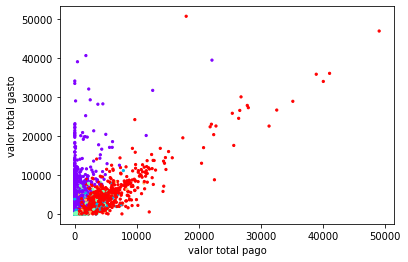

In [20]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

Foram gerados dois maiores grupos com duas cores predominantes, o roxo e o laranja.

Ao analisarmos o cluster roxo, notaremos que há uma tendência a desenhar uma linha reta na vertical, o que indica que o valor total gasto dos clientes aumenta, mas o valor total pago não acompanha essa ascendência.

De maneira geral, o que conseguimos perceber é que o cluster representa os clientes que gastaram mais, contudo não pagaram a fatura ou a pagaram parcialmente.

Já o cluster representado pela cor laranja notaremos uma diagonal, o que indica que a medida que o valor gasto aumenta o valor pago também. Esse cluster representa os clientes que pagaram a fatura ou quase seu valor total.

Temos informações interessantes, mas isso não é o suficiente para compreender todo o conjunto. Plotaremos outras dimensões, mas sempre em pares, e assim conseguiremos interpretar outros atributos de maneira clara, visível.

Utilizaremos a biblioteca seaborn como sns para plotarmos os atributos par a par. Atribuiremos uma nova coluna para o dataframe em que inseriremos os labels, afinal trata-se de um requisito para a função.

Depois, utilizaremos pairplot() recebendo o dataframe com as colunas que queremos, e como serão todas, escreveremos 0: entre os colchetes. Depois, o atributo hue diferencia o gráfico por cores a partir da coluna.

import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")COPIAR CÓDIGO
Feito isso teremos um grande conjunto de gráficos, todos divididos em pares, cerca de 280. São muitos, e isso dificulta nosso processo de validação as informações com a visualização dessa forma.

A visualização nem sempre é uma técnica que irá nos auxiliar na interpretação de clusters.

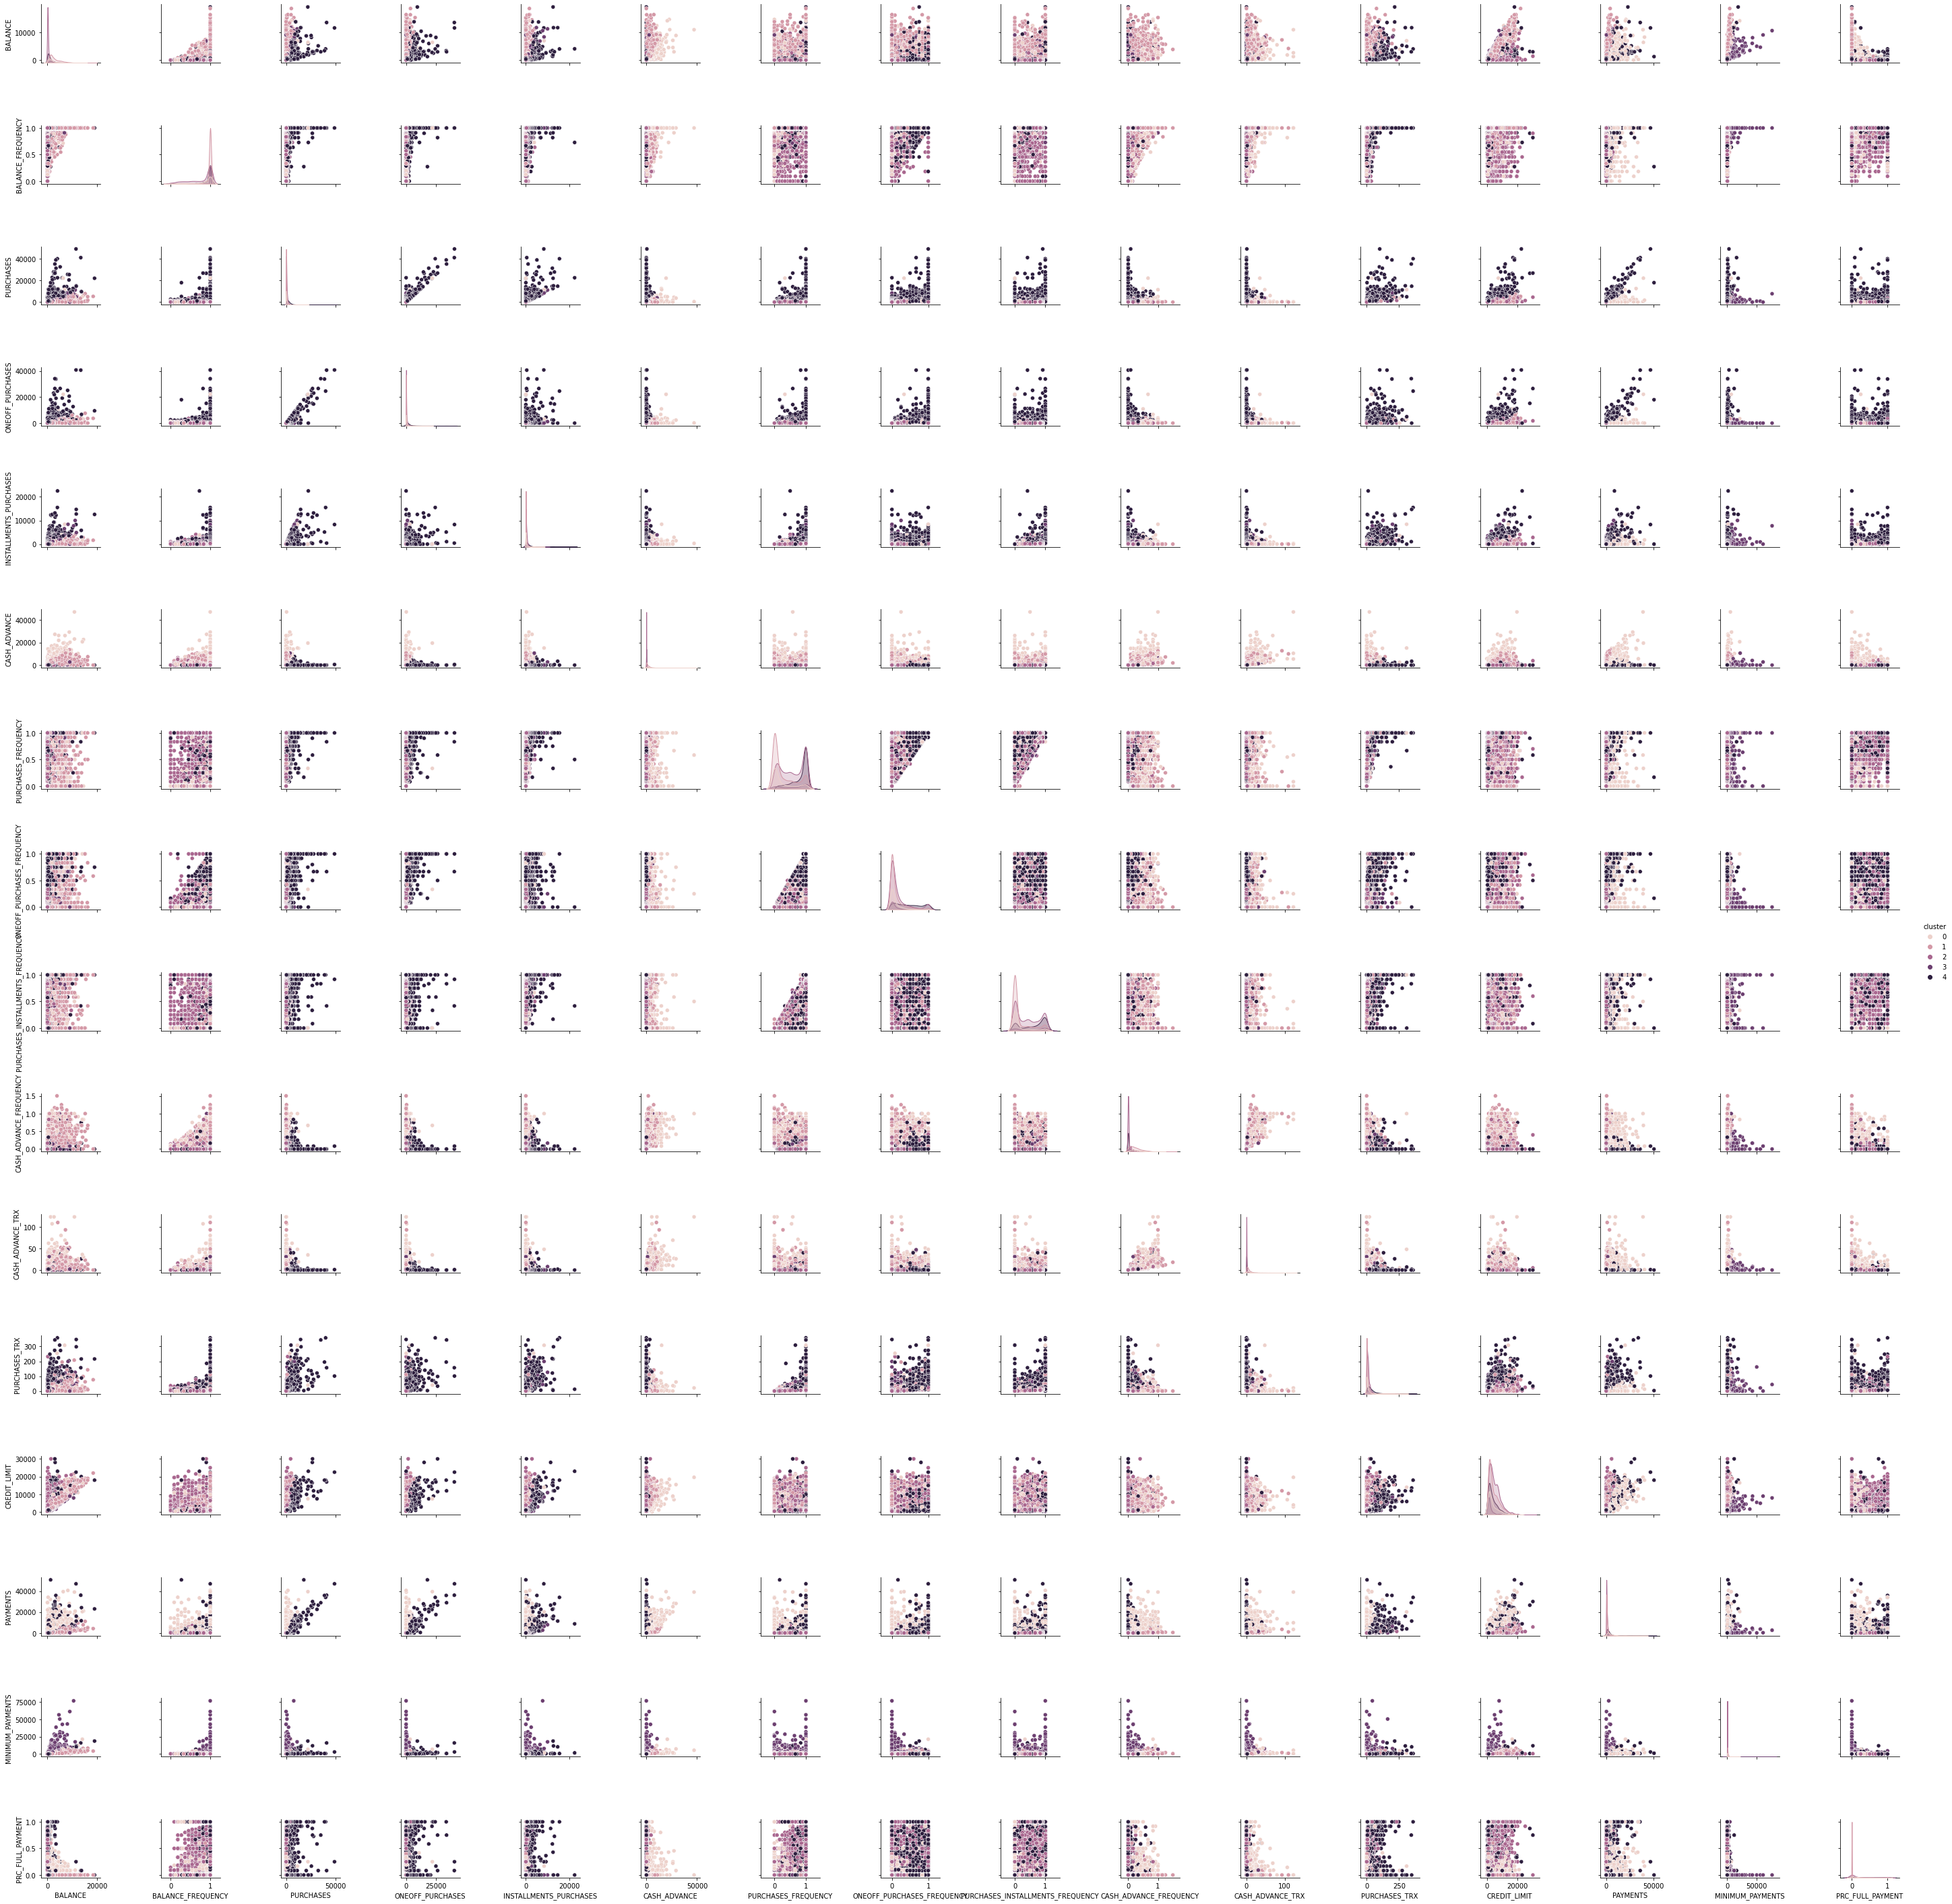

In [21]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

In [22]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1072.0  1794.637544  1983.094646   0.000000   506.925348   
1        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
2        3280.0   443.746756   846.398201   0.000000    23.365333   
3         412.0  1987.146873  1852.215743  70.794108  1020.146724   
4        1538.0  1143.712630  1664.669654   0.000000   212.513230   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1087.920500  2316.353276  14581.459140            1072.0  0.862113   
1        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
2          82.941478   410.126095   9630.367575            3280.0  0.774389   
3        1338.918346  2133.415063  11670.179850             412.0  0.989512   
4         555.745265  1371.943854  19043.138560            1538.0  0.928255   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       886.834603  21235.065300           1072.0  0.117280   
1        ...      1330.437428   8345.641905           2648.0  0.001800   
2        ...       248.733727   4483.503862           3280.0  0.246806   
3        ...      7086.774783  76406.207520            412.0  0.019271   
4        ...       524.765832  18621.013310           1538.0  0.278149   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186888  0.0  0.0  0.083333  0.142857  1.0  
1        0.023264  0.0  0.0  0.000000  0.000000  0.6  
2        0.346748  0.0  0.0  0.000000  0.444444  1.0  
3        0.090795  0.0  0.0  0.000000  0.000000  1.0  
4        0.366934  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

Tentaremos observar alguns valores estatísticos, como o valor total gasto pelo cliente ou a média de gastos por clientes em um cluster específico, por exemplo, entre outros recortes.

Para isso, coletaremos nosso dataframe e agruparemos usando .groupby() na nova coluna que criamos, a "cluster".

Em seguida, escreveremos .describe() para termos todos os tipos de valroes estatísticos.

dataframe.groupby("cluster").describe()COPIAR CÓDIGO
BALANCE								BALANCE_FREQUENCY		...	MINIMUM_PAYMENTS		PRC_FULL_PAYMENT							
count	mean	std	min	25%	50%	75%	max	count	mean	...	75%	max	count	mean	std	min	25%	50%	75%	max
cluster																					
0	1541.0	1140.395363	1663.836536	0.000000	209.490297	552.464447	1369.969909	19043.138560	1541.0	0.928099	...	523.422296	18621.013310	1541.0	0.279266	0.367477	0.0	0.0	0.083333	0.545455	1.0
1	412.0	1987.146873	1852.215743	70.794108	1020.146724	1338.918346	2133.415063	11670.179850	412.0	0.989512	...	7086.774783	76406.207520	412.0	0.019271	0.090795	0.0	0.0	0.000000	0.000000	1.0
2	2649.0	3037.962543	2478.838161	6.824905	1256.612223	2174.018945	4223.867789	18495.558550	2649.0	0.963740	...	1330.593643	8345.641905	2649.0	0.001799	0.023260	0.0	0.0	0.000000	0.000000	0.6
3	1072.0	1794.024195	1982.950586	0.000000	506.925348	1087.920500	2308.762488	14581.459140	1072.0	0.862131	...	884.718306	21235.065300	1072.0	0.117384	0.186853	0.0	0.0	0.083333	0.142857	1.0
4	3276.0	444.212219	846.809334	0.000000	23.287145	82.992153	411.833075	9630.367575	3276.0	0.774280	...	248.900782	4483.503862	3276.0	0.246293	0.346454	0.0	0.0	0.000000	0.444444	1.0
5 rows × 128 columns

Teremos uma descrição estatistica para cada um dos atributos.

O primeiro atributo de exemplo será o BALANCE, isto é, o limite disponível na conta de um cliente. Teremos a média e quantidade de clientes que temos em cada um dos cinco clusters.

Observando as médias em mean, há o cluster em que os clientes possuem o menor limite disponíveis, mais ou menos 440 reais, e ele é composto pelo maior número de elementos. Portanto o maior número de clientes da empresa de cartão de crédito possui um limite baixo.

Temos muitos atributos para se analisar, neste caso são 16, tanto que a tabela nem exibe todos. Ainda há casos em que há muitos mais, portanto é uma análise que seria impossível ser realizada por um aspecto visual.

Selecionaremos alguns dos atributos mais significativos. O que não quer dizer que os outros não sejam importantes, mas precisaremos fazer essa triagem para executar nossa análise. Nos basearemos nos centroides para tomar nossas decisões.

Utilizaremos o kmeans para coletar os centroides na variável centroids usando .cluster_centers_, e depois imprimiremos da seguinte maneira:

In [23]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.35417892e-01 2.16635031e-04 6.01593847e-02 3.41108036e-02
  2.60537957e-02 4.00438484e-01 5.27178877e-05 2.04676638e-05
  3.52785951e-05 6.55507889e-05 1.57259277e-03 1.12193031e-03
  5.35208153e-01 5.97633409e-01 1.04565201e-01 2.77429650e-05]
 [5.04294070e-01 2.72242076e-04 6.17554553e-02 3.62405829e-02
  2.55365937e-02 2.52765717e-01 6.72943541e-05 2.57072238e-05
  4.50409323e-05 5.74261583e-05 1.15669149e-03 1.33139220e-03
  7.19260678e-01 1.66160406e-01 1.79203910e-01 5.52512128e-07]
 [6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [3.32972556e-01 2.68240066e-04 1.58923673e-01 3.62178588e-02
  1.23089552e-01 5.82140753e-02 1.66817881e-04 2.64295391e-05
  1.47135264e-04 1.92748591e-05 4.26896159e-04 3.86195702e-03
  3.76646957e-01 2.52402941e-01 6.79571553e-01 4.22964707e-06]
 [1.

Teremos o valor de cada um dos 16 atributos dos 5 clusters. Observaremos a variância dos centroides para um determinado atributo, isto é, coletaremos um atributo e verificaremos como se comporta nos diferentes clusters.

Por exemplo, se pegarmos o primeiro cluster de valor 1.59738813e-01 para o primeiro atributo, o que estávamos vendo antes do balanço.

O próximo cluster já estará bem diferente, e o mesmo acontece com os seguintes.

Como analisaremos a variância, buscaremos um atributo em que os valores sejam diferentes entre os clusters, pois assim ampliamos a chance de observar as particularidades de cada grupo.

Por exemplo, podemos ver que temos clientes que gastam muito em um cluster, e em outro, que gastam pouco. Mas pode ser que haja algum outro atributo em que a diferença não seja não impactante e não nos ajudará na interpretação, e inclusive atrapalhe.

Porém, não precisaremos fazer isso visualmente e calcular manualmente, então usaremos o cálculo da variância, conforme aprendemos nas aulas de validação.

Aqueles atributos que possuírem a maior variância serão os utilizados.

In [24]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


Primeiramente coletaremos a quantidade de atributos em centroids[] com o valor 0 que significa a primeira linha, e tudo ficará em max, o valor máximo de atributos.

Faremos um for até o valor máximo de atributos range(max) e então faremos o print() com o nome de cada um dos atributos escrevendo dataframe.columns.values[i].

Então podemos calcular a variância com .var(). Temos os centroids[] pegaremos todos os clusters parao atributo representado por i escrevendo : entre os colchetes.

Usaremos a função len() recebendo os centroids[0] para o tamanho, e formataremos a visualização das informações por meio da função .format() com no máximo quatro casas após a vírgula.

Para isso, escreveremos \n{:.4f} entre aspas, com o tipo do número float e a barra invertida para a quebra de linha que melhorará o vistual do out.
Teremos como resultado a variância para cada um dos dezesseis atributos, então podemos selecionar visualmente qual será utilizado para nossa análise, pois ficou bem mais simples.

Selecionamos os atributos BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS e MINIMUM_PAYMENTS, que são aqueles que possuem apenas um zero após a vírgula. OS colocaremos lado a lado na célula seguinte como apenas conteúdo markdown.
Vamos relembrar o que cada um desses atributos representa para verificar se de fato faz sentido que eles sejam analisados em conjunto.

BALANCE = limite disponível do cliente
PURCHASES = valor total de compras
CASH_ADVANCE = valor total de saques
CREDIT_LIMIT = limite total de crédito
PAYMENTS = valor total pago
MINIMUM_PAYMENTS = o mínimo pago
O último atributo MINIMUM_PAYMENTS não nos interessa pois não trará muitos benefícios para a interpretação, então o removeremos da lista.

Dessa forma, temos cinco atributos a serem utilizados para a análise detalhada dos clusters.

BALANCE 0.0223
PURCHASES 0.0197
CASH_ADVANCE 0.0225
CREDIT_LIMIT 0.0362
PAYMENTS 0.0279

In [25]:
dataframe.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1072.0,1794.637544,1983.094646,0.000000,506.925348,1087.920500,2316.353276,14581.459140
1,2648.0,3038.132314,2479.290949,6.824905,1256.126442,2173.994774,4224.605542,18495.558550
2,3280.0,443.746756,846.398201,0.000000,23.365333,82.941478,410.126095,9630.367575
3,412.0,1987.146873,1852.215743,70.794108,1020.146724,1338.918346,2133.415063,11670.179850
4,1538.0,1143.712630,1664.669654,0.000000,212.513230,555.745265,1371.943854,19043.138560


É interessante observamos como está a distribuição dos dados,  só utilizaremos a média mean de cada um dos atributos.

Com isso, agruparemos todos os atributos que escolhemos no lugar de apenas "BALANCE", e depois chamaremos este agrupamento de description. Como queremos a média, imprimiremos apenas description.mean().

In [26]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
print(description.mean())



             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0        1794.637544   470.990466   3269.757206   3974.040310  4701.016454
1        3038.132314   385.096760   1636.114441   4496.336858   968.599396
2         443.746756   629.249107    141.482978   5130.547795   814.294226
3        1987.146873   858.326286    420.107194   2226.699029  1338.974045
4        1143.712630  3274.692952    186.045097   4103.875261  3046.004076


<ipython-input-26-11e2033311d4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


Teremos para cada um dos atributos a média para o cluster correspondente.

Contudo, há um outro atributo interessante de observarmos: o relacionado à quantidade de elementos do grupo. Escreveremos n_clients = description.size() para o número de clusters que temos.

Criaremos uma nova coluna para visualizar esse dado escrevendo description['n_clients'] que receberá o valor de n_clients.

Quando pegarmos a média, atribuiremos à variável description sendo igual a description.mean() para gerarmos um dataframe neste formato para podermos atribuir n_clients. Por fim, e imprimiremos description.

In [29]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1794.637544   470.990466   3269.757206   3974.040310  4701.016454   
1        3038.132314   385.096760   1636.114441   4496.336858   968.599396   
2         443.746756   629.249107    141.482978   5130.547795   814.294226   
3        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
4        1143.712630  3274.692952    186.045097   4103.875261  3046.004076   

         n_clients  
cluster             
0             1072  
1             2648  
2             3280  
3              412  
4             1538  


<ipython-input-29-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


CLUSTER 0: Clientes que gastam pouco.Clientes com o maior limite.Bons pagadores.Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque.Piores pagadores.
Boa quantidade de clientes.


CLUSTER 2: Clientes que gastam muito com compras.Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques.Pagam às vezes.

CLUSTER 4: Clientes com o menor limite.Não são bons pagadores.Menor quantidade de clientes.

In [31]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1072.0,0.117280,0.186888,0.0,0.0,0.083333,0.142857,1.0
1,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
2,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
3,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
4,1538.0,0.278149,0.366934,0.0,0.0,0.083333,0.545455,1.0
